In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [14]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [16]:
X = data.data
y = data.target

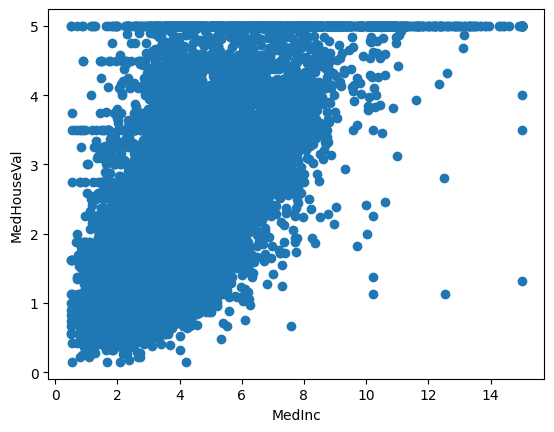

In [17]:
plt.scatter(X[:,0],y)
plt.xlabel(data.feature_names[0])
plt.ylabel(data.target_names[0])
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_vals = Pipeline([("imputer",SimpleImputer(strategy='mean')), ("scale",StandardScaler())])

In [25]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

search_space = [{'regr': [LinearRegression()], 'regr__fit_intercept': [True,False]},
                {'regr':[Ridge()],
                     'regr__alpha': [0.01,0.1,1,10,100]},
                {'regr':[Lasso()],
                     'regr__alpha': [0.01,0.1,1,10,100]}]

In [33]:
pipeline = Pipeline([("preprocess",num_vals), 
                     ("regr",LinearRegression())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scale', StandardScaler())])),
                ('regr', LinearRegression())])

In [34]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(pipeline, search_space, scoring='neg_mean_squared_error', cv=5)
gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer()),
                                                        ('scale',
                                                         StandardScaler())])),
                                       ('regr', LinearRegression())]),
             param_grid=[{'regr': [LinearRegression()],
                          'regr__fit_intercept': [True, False]},
                         {'regr': [Ridge()],
                          'regr__alpha': [0.01, 0.1, 1, 10, 100]},
                         {'regr': [Lasso()],
                          'regr__alpha': [0.01, 0.1, 1, 10, 100]}],
             scoring='neg_mean_squared_error')

In [35]:
## ii. Find the best pipeline
best_pipeline = gs.best_estimator_

## iii. Find the best regression model
best_regression_model = best_pipeline.named_steps['regr']

print('The best regression model is:')
print(best_regression_model)

## iv. Find the hyperparameters of the best regression model
best_model_hyperparameters = best_regression_model.get_params()
print('The hyperparameters of the regression model are:')
print(best_model_hyperparameters)

The best regression model is:
Ridge(alpha=10)
The hyperparameters of the regression model are:
{'alpha': 10, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}


In [37]:
best_score = best_pipeline.score(x_test, y_test)
print('The best score is:')
print(best_score)

The best score is:
0.6057239942207633


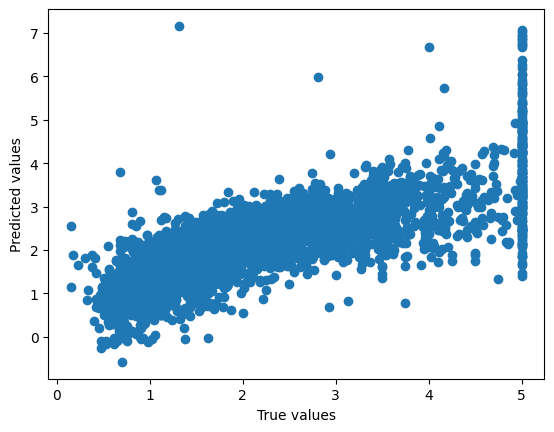

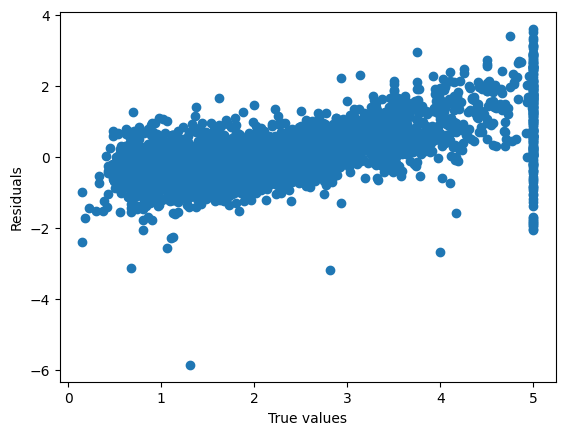

Mean squared error: 0.5179134826824625
Mean absolute error: 0.528578728952374
R-squared score: 0.6056763896339799


In [41]:
from sklearn.metrics import r2_score

y_pred = best_pipeline.predict(x_test)

# Plot the true and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.show()

# Plot the residuals
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("True values")
plt.ylabel("Residuals")
plt.show()

# Plot the mean squared error (MSE)
mse = ((y_test - y_pred) ** 2).mean()
print("Mean squared error:", mse)

# Plot the mean absolute error (MAE)
mae = (np.abs(y_test - y_pred)).mean()
print("Mean absolute error:", mae)

# Plot the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

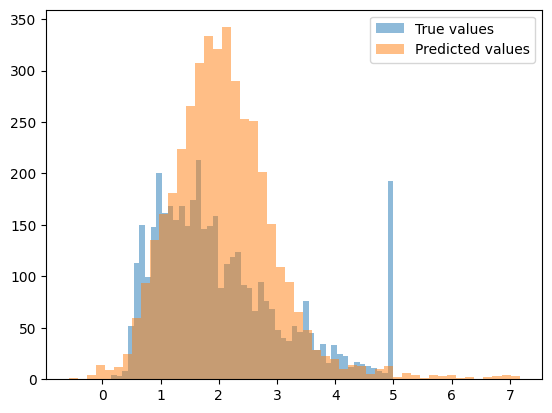

In [42]:
plt.hist(y_test, bins=50, alpha=0.5, label='True values')
plt.hist(y_pred, bins=50, alpha=0.5, label='Predicted values')
plt.legend()
plt.show()

In [48]:
X = pd.DataFrame(data.data, columns=data.feature_names)

feature_names = X.columns
weights = best_pipeline.named_steps['regr'].coef_
for feature_name, weight in zip(feature_names, weights):
    print(f"{feature_name}: {weight}")

MedInc: 0.8322186583450355
HouseAge: 0.11777631933202826
AveRooms: -0.27225555001094076
AveBedrms: 0.31662752885788914
Population: -0.007174162165938694
AveOccup: -0.039564051206617226
Latitude: -0.8840771645732484
Longitude: -0.8547853433447635
